<a href="https://colab.research.google.com/github/anushree124/Face-Detection-using-OpenCV-in-Python/blob/main/Face_Detection_In_Python_Using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python

In [3]:
#import required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [4]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
import os
print("Contents of /content:", os.listdir('/content'))

Contents of /content: ['.config', 'drive', 'sample_data']


In [6]:
test1 = cv2.imread('/content/drive/datatest.jpg')

In [7]:
test1 = cv2.imread('/content/drive/MyDrive/datatest.jpg')

In [11]:
import os

# Change to the root directory
os.chdir('/')

# Now try to read the file
test1 = cv2.imread('/content/test1.jpg')
if test1 is None:
    print("Error: Unable to load the image file '/content/test1.jpg'")
else:
    print("Image loaded successfully")
    # Continue with your processing here

Image loaded successfully


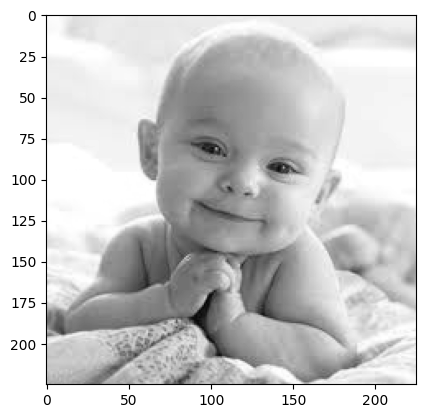

In [12]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')

#load test iamge
test1 = cv2.imread('/content/test1.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

#display the gray image using OpenCV
# cv2.imshow('Test Imag', gray_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#or if you have matplotlib installed then
plt.imshow(gray_img, cmap='gray')

In [15]:
print(gray_img.shape, gray_img.dtype)

(225, 225) uint8


In [17]:
gray_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)
gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2GRAY)

In [54]:
try:
    faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)
except cv2.error as e:
    print(f"OpenCV error: {e}")

In [21]:
haar_face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [55]:
print(gray_img)


[[251 251 251 ... 242 242 242]
 [251 251 251 ... 242 242 242]
 [250 250 251 ... 241 241 241]
 ...
 [179 178 182 ... 246 245 248]
 [183 183 177 ... 243 243 244]
 [179 175 164 ... 238 236 239]]


In [56]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


In [57]:
#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

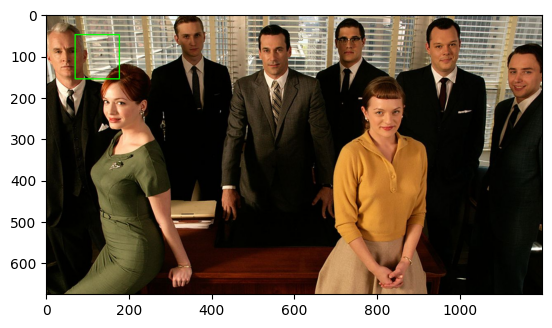

In [58]:
#conver image to RGB and show image
plt.imshow(convertToRGB(test1))

In [59]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    img_copy = np.copy(colored_img)
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img_copy

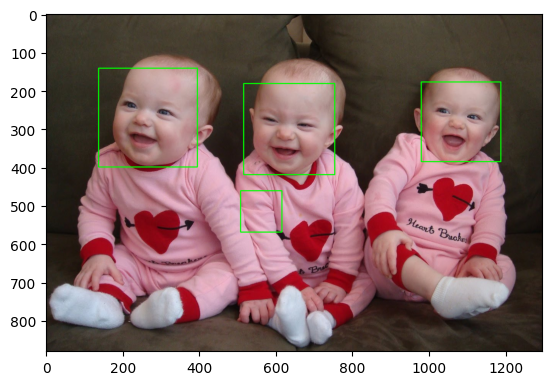

In [60]:
#load another image
test2 = cv2.imread('/content/test3.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

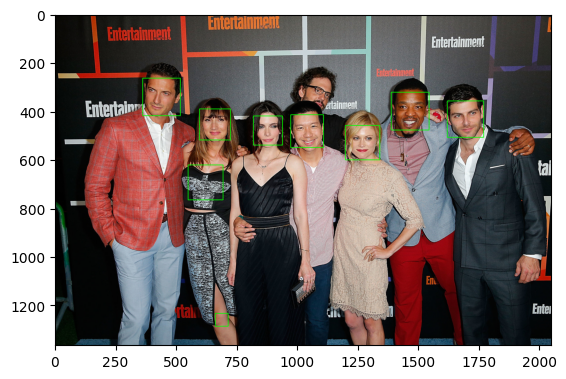

In [61]:
#load another image
test2 = cv2.imread('/content/test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

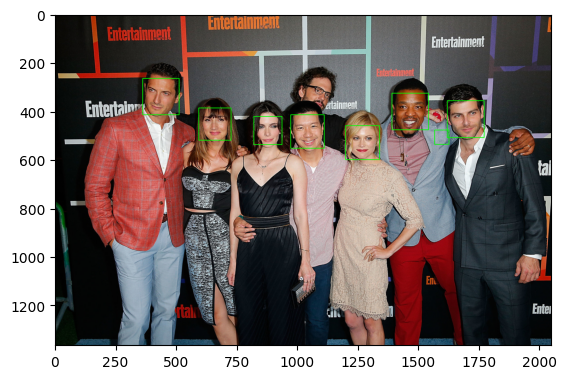

In [62]:
#load another image
test2 = cv2.imread('/content/test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor=1.2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

In [63]:
print('data/lbpcascade_frontalface.xml')

data/lbpcascade_frontalface.xml


In [64]:
# Load cascade classifier
lbp_face_cascade = cv2.CascadeClassifier('/content/lbpcascade_frontalface.xml')

# Check if the cascade classifier is loaded successfully
if lbp_face_cascade.empty():  # Check if cascade loaded properly
    print("Error loading cascade classifier")
else:
    print("Cascade classifier loaded successfully")


Cascade classifier loaded successfully


In [65]:
print(test2)


[[[ 5  9  3]
  [ 5  9  4]
  [ 5  9  4]
  ...
  [32 38 37]
  [33 39 38]
  [35 41 40]]

 [[ 5  9  4]
  [ 5  9  4]
  [ 5  8  6]
  ...
  [35 41 40]
  [33 39 38]
  [31 37 36]]

 [[ 5  9  4]
  [ 5  8  6]
  [ 5  8  6]
  ...
  [39 45 44]
  [34 40 39]
  [29 35 34]]

 ...

 [[ 2 14  2]
  [ 3 15  3]
  [ 3 15  3]
  ...
  [79 51 16]
  [85 58 21]
  [99 72 35]]

 [[ 1 13  1]
  [ 2 14  2]
  [ 4 16  4]
  ...
  [85 58 21]
  [91 64 27]
  [93 66 29]]

 [[ 0 13  0]
  [ 2 15  1]
  [ 4 17  3]
  ...
  [83 57 17]
  [87 60 23]
  [95 68 31]]]


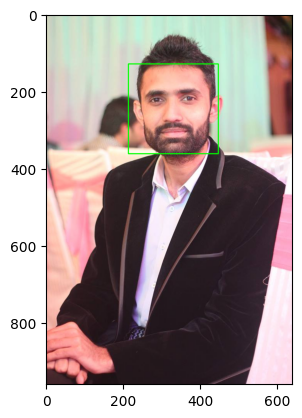

In [66]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('/content/lbpcascade_frontalface.xml')

#load test image
test2 = cv2.imread('/content/test2.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

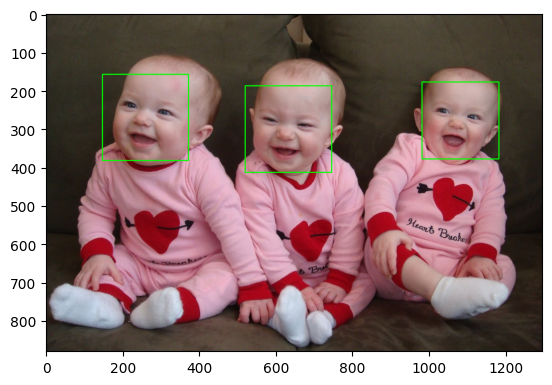

In [67]:
#load test image
test2 = cv2.imread('/content/test3.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

In [68]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt.xml')
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('/content/lbpcascade_frontalface.xml')

#load test image1
test1 = cv2.imread('/content/test5.jpg')
#load test image2
test2 = cv2.imread('/content/test6.jpg')

In [70]:
if test1 is None:
    print("Image not loaded properly")


Image /content/test1.jpg loaded successfully.
Haar Detection time: 0.029 seconds
LBP Detection time: 0.011 seconds


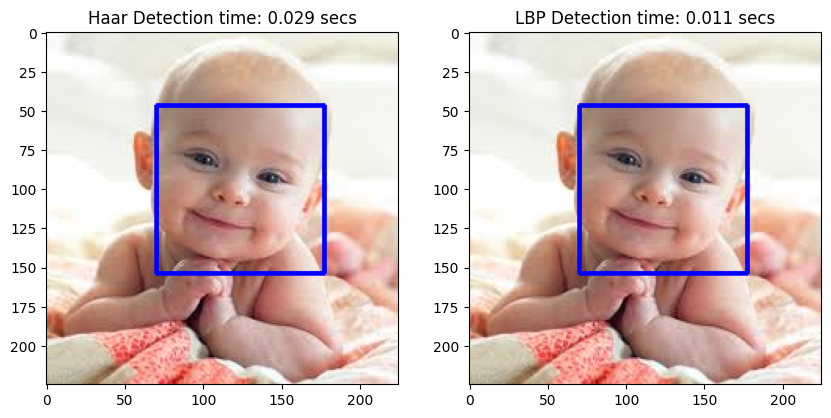

In [77]:
import cv2
import time
import matplotlib.pyplot as plt

# Function to convert image from BGR to RGB for plotting
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Function to detect faces using a given classifier
def detect_faces(f_cascade, colored_img, scaleFactor=1.1):
    if colored_img is None:
        raise ValueError("The input image is empty or not loaded correctly.")

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(colored_img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5)

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(colored_img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    return colored_img

# Load the image
test1_path = '/content/test1.jpg'  # Replace with your actual image path
test1 = cv2.imread(test1_path)

# Check if the image was loaded properly
if test1 is None:
    print(f"Error: Image at {test1_path} could not be loaded.")
else:
    print(f"Image {test1_path} loaded successfully.")

# Load Haar and LBP cascades
haar_face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the LBP cascade manually (provide the correct path where you saved the file)
lbp_cascade_path = '/content/lbpcascade_frontalface.xml'  # Replace with the actual path
lbp_face_cascade = cv2.CascadeClassifier(lbp_cascade_path)

# Ensure the cascades are loaded properly
if haar_face_cascade.empty():
    print("Error: Haar cascade not loaded properly.")
if lbp_face_cascade.empty():
    print("Error: LBP cascade not loaded properly.")

# Perform face detection with Haar Cascade
t1 = time.time()
haar_detected_img = detect_faces(haar_face_cascade, test1)
t2 = time.time()
dt1 = t2 - t1
print(f"Haar Detection time: {round(dt1, 3)} seconds")

# Perform face detection with LBP Cascade
t1 = time.time()
lbp_detected_img = detect_faces(lbp_face_cascade, test1)
t2 = time.time()
dt2 = t2 - t1
print(f"LBP Detection time: {round(dt2, 3)} seconds")

# Plotting the results
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Show Haar detected image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

# Show LBP detected image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

# Display images
plt.show()
